# Hibrid states
In the case of 2 quantum dots populate with 2 holes in absence of Spin-Orbint interaction the Hamiltoninan in the molecular base ($T_-(1,1)$, $S(1,1)$ and $S(0,2)$) is given by

$$
H_0(\varepsilon)=\left(\begin{array}{ccc}
-g\mu_B B & 0 & 0 \\ 0 & 0 & \sqrt{2}\tau \\ 0 & \sqrt{2}\tau & \varepsilon+u
\end{array}
\right)
$$

The parameters that we will use are:

$$
\begin{split}
u&=2 \; meV\\
\tau&=0.25 \; \mu eV\\
B&=20 \;mT\\
g&=1.35\\
E_T&=1.56 \; \mu eV
\end{split}
$$

The eigenenergies of this Hamiltonian are:

$$
\begin{split}
E_S&=\left(u+\varepsilon-\sqrt{8\tau^2+(u+\varepsilon)^2}\right)/2\\
E_{S^{\prime}}&=\left(u+\varepsilon+\sqrt{8\tau^2+(u+\varepsilon)^2}\right)/2\\
E_T&=-g\mu_B B
\end{split}
$$

And the eigenstates correspond to two hibridized singlets and the triplet:

$$
\begin{aligned}|S\rangle &= c(\varepsilon)|S(1,1)\rangle+\sqrt{1-c(\varepsilon)^{2}}|S(0,2)\rangle \\\left|S^{\prime}\right\rangle &= c^{\prime}(\varepsilon)|S(1,1)\rangle+\sqrt{1-c^{\prime}(\varepsilon)^{2}}|S(0,2)\rangle \\|T\rangle &=\left|T_{-}\right\rangle \end{aligned}
$$

The exact expression for the eigenvectors **without the normalition** are:

$$
\begin{split}
|S\rangle&=-\dfrac{u+\varepsilon+\sqrt{8\tau^2+(u+\varepsilon)^2}}{2\sqrt{2}\tau}|S(1,1)\rangle+|S(0,2)\rangle \\
|S^{\prime}\rangle&=\dfrac{-u-\varepsilon+\sqrt{8\tau^2+(u+\varepsilon)^2}}{2\sqrt{2}\tau}|S(1,1)\rangle+|S(0,2)\rangle \\
\end{split}
$$

In [1]:
#Libraries#
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Parameters (in ueV)#
e=1.6023e-19 # Electron charge
muB=9.274e-24 # Bohr magneton
u=2000 # Intradot energy
g=1.35 # g-factor of GaAs
B=20e-3 # Magnetic field
ET=g*muB*B/e*10**6 # 2 x Zeeman spliting
tau=0.25 # Spin conserving tunneling

In [3]:
#Hibridized energies
Es= lambda e: (u+e-np.sqrt(8*tau**2+(u+e)**2))/2
Es_= lambda e: (u+e+np.sqrt(8*tau**2+(u+e)**2))/2

#Hibridized eigenvectors
c_temp=lambda e: -(u+e+np.sqrt(8*tau**2+(u+e)**2))/(2*np.sqrt(2)*tau)
c_prime_temp=lambda e: (-u-e+np.sqrt(8*tau**2+(u+e)**2))/(2*np.sqrt(2)*tau)
c_norm=lambda e: c_temp(e)/np.sqrt(c_temp(e)**2+1)
c_prime_norm=lambda e: c_prime_temp(e)/np.sqrt(c_prime_temp(e)**2+1)

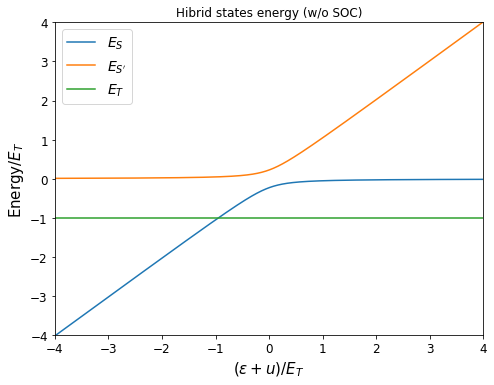

In [4]:
e=np.linspace(-4,4,1000)*ET-u

plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=14)
plt.rc('figure', titlesize=15)

fig1=plt.figure(figsize=(7.68,5.76))
ax1=fig1.add_subplot(1,1,1)
ax1.plot((e+u)/ET,Es(e)/ET, label=r'$E_S$')
ax1.plot((e+u)/ET,Es_(e)/ET, label='$E_{S^{\prime}}$')
ax1.plot((e+u)/ET,-ET/ET+0*e, label=r'$E_T$')
ax1.set_xlim(-4,4)
ax1.set_ylim(-4,4)
ax1.legend()
ax1.set_xlabel(r'$(\varepsilon+u)/E_T$')
ax1.set_ylabel(r'Energy$/E_T$')
ax1.set_title('Hibrid states energy (w/o SOC)');

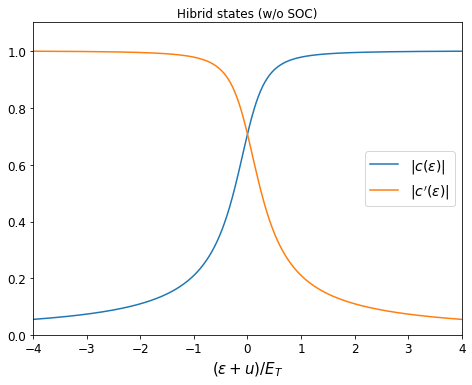

In [5]:
fig2=plt.figure(figsize=(7.68,5.76))
ax2=fig2.add_subplot(1,1,1)
ax2.plot((e+u)/ET,np.abs(c_norm(e)), label=r'$|c(\varepsilon)|$')
ax2.plot((e+u)/ET,np.abs(c_prime_norm(e)), label=r'$|c^{\prime}(\varepsilon)|$')
ax2.set_xlim(-4,4)
ax2.set_ylim(0,1.1)
ax2.legend()
ax2.set_xlabel(r'$(\varepsilon+u)/E_T$')
ax2.set_title('Hibrid states (w/o SOC)');

We can introduce the spin-orbit coupling, for which we obtain the Hamiltonian (in the same basis as before) given by:

$$
H_0(\varepsilon)=\left(\begin{array}{ccc}
-g\mu_B B & \lambda_1 & \lambda_2 \\ \lambda_1 & 0 & \sqrt{2}\tau \\
\lambda_2 & \sqrt{2}\tau & \varepsilon+u
\end{array}\right)
$$

By chossing proper a proper distance between the quantum dots we can obtain $\lambda_1/\lambda_2 \approx 1/100$, we will use the parameters:

$$
\begin{split}
\lambda_1&=0.001 \; \mu eV\\
\lambda_2& =0.1\; \mu eV
\end{split}
$$

Now we can't find a analliyical expression for the eigenvalues and eigenvectors, so we need to compute numerically.

In [6]:
#Parameters (in ueV)#
e=1.6023e-19 # Electron charge
muB=9.274e-24 # Bohr magneton
u=2000 # Intradot energy
g=1.35 # g-factor of GaAs
B=20e-3 # Magnetic field
ET=g*muB*B/e*10**6 # 2 x Zeeman spliting
tau=0.25 # Spin conserving tunneling
l1=0.001 # Spin flip in the same dot
l2=0.1 #Spin flip tunneling

In [7]:
def Hamiltonian(e):
    H=np.array([[-ET,l1,l2],[l1,0,np.sqrt(2)*tau],[l2,np.sqrt(2)*tau,e+u]])
    return H


N=1000
e=np.linspace(-4,4,N)*ET-u

hypermatrix=np.zeros([N,3,3],dtype=complex)
for i in range (0,N):
    hypermatrix[i,:,:]=Hamiltonian(e[i])

eigensystem=np.linalg.eigh(hypermatrix)
energies=eigensystem[0]
states=eigensystem[1]

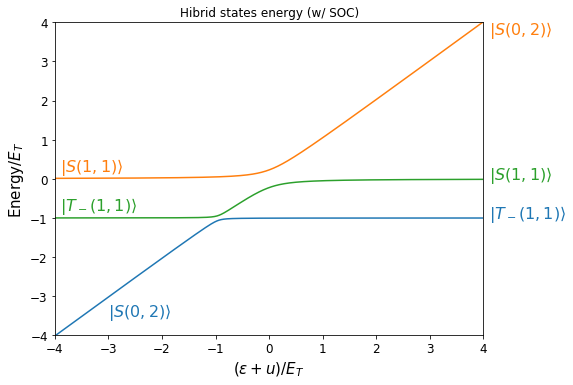

In [8]:
fig3=plt.figure(figsize=(7.68,5.76))
ax3=fig3.add_subplot(1,1,1)
ax3.plot((e+u)/ET,energies[:,0]/ET)
ax3.plot((e+u)/ET,energies[:,1]/ET,'tab:green')
ax3.plot((e+u)/ET,energies[:,2]/ET,'tab:orange')

ax3.text(4.1,0,r'$|S(1,1)\rangle$',{'color':'tab:green','fontsize':16})
ax3.text(4.1,3.7,r'$|S(0,2)\rangle$',{'color':'tab:orange','fontsize':16})
ax3.text(4.1,-1,r'$|T_-(1,1)\rangle$',{'color':'tab:blue','fontsize':16})

ax3.text(-3.9,0.2,r'$|S(1,1)\rangle$',{'color':'tab:orange','fontsize':16})
ax3.text(-3,-3.5,r'$|S(0,2)\rangle$',{'color':'tab:blue','fontsize':16})
ax3.text(-3.9,-0.8,r'$|T_-(1,1)\rangle$',{'color':'tab:green','fontsize':16})

ax3.set_xlim(-4,4)
ax3.set_ylim(-4,4)
ax3.set_xlabel(r'$(\varepsilon+u)/E_T$')
ax3.set_ylabel(r'Energy$/E_T$')
ax3.set_title('Hibrid states energy (w/ SOC)');

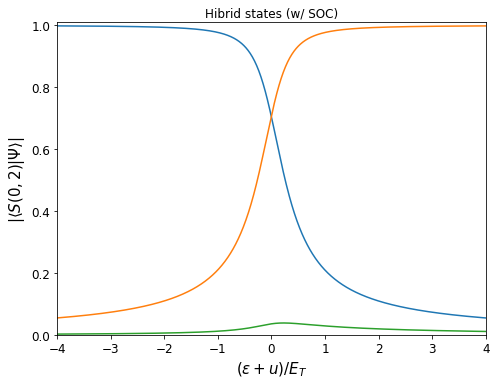

In [9]:
fig4=plt.figure(figsize=(7.68,5.76))
ax4=fig4.add_subplot(1,1,1)

ax4.plot((e+u)/ET,np.abs(states[:,1])[:,2],'tab:blue')
ax4.plot((e+u)/ET,np.abs(states[:,0])[:,2],'tab:green')
ax4.plot((e+u)/ET,np.abs(states[:,2])[:,2],'tab:orange')

ax4.set_xlim(-4,4)
ax4.set_ylim(0,1.01)

ax4.set_xlabel(r'$(\varepsilon+u)/E_T$')
ax4.set_ylabel(r'$|\langle S(0,2)|\Psi\rangle$|')
ax4.set_title('Hibrid states (w/ SOC)');

In [10]:
np.max(np.abs(states[:,0])[:,2])

0.04005923105060539

# Graphs to be save
From this point, the code is only to save some grpahs with specific colors or sizes to look good in the pdf file

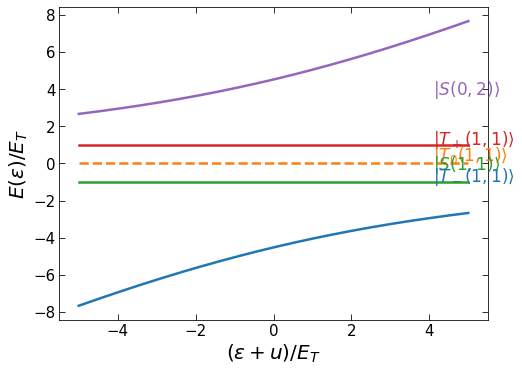

In [11]:
#Parameters (in ueV)#
e=1.6023e-19 # Electron charge
muB=9.274e-24 # Bohr magneton
u=2000 # Intradot energy
g=1.35 # g-factor of GaAs
B=20e-3 # Magnetic field
ET=g*muB*B/e*10**6 # 2 x Zeeman spliting
tau=5 # Spin conserving tunneling


def Hamiltonian(e):
    H=np.array([[ET,0,0,0,0],[0,0,0,0,-tau],[0,0,0,0,tau],[0,0,0,-ET,0],[0,-tau,tau,0,u+e]])
    return H


N=1000
e=5*np.linspace(-1,1,N)*ET-u

hypermatrix=np.zeros([N,5,5],dtype=complex)
for i in range (0,N):
    hypermatrix[i,:,:]=Hamiltonian(e[i])

eigensystem=np.linalg.eigh(hypermatrix)
energies=eigensystem[0]
states=eigensystem[1]

plt.rc('text', usetex=False)
line_width=2.5
annotation_size=17
label_size=20
tick_labe_size=15

fig4=plt.figure(figsize=(7.68,5.76))
ax4=fig4.add_subplot(1,1,1)
ax4.plot((e+u)/ET,energies[:,0]/ET,'tab:blue',linewidth=line_width)
ax4.plot((e+u)/ET,energies[:,1]/ET,'tab:green',linewidth=line_width)
ax4.plot((e+u)/ET,energies[:,2]/ET,'--',color='tab:orange',linewidth=line_width)
ax4.plot((e+u)/ET,energies[:,3]/ET,'tab:red',linewidth=line_width)
ax4.plot((e+u)/ET,energies[:,4]/ET,'tab:purple',linewidth=line_width)

ax4.text(4.1,3.7,r'$|S(0,2)\rangle$',{'color':'tab:purple','fontsize':annotation_size})
ax4.text(4.1,1,r'$|T_+(1,1)\rangle$',{'color':'tab:red','fontsize':annotation_size})
ax4.text(4.1,0.15,r'$|T_0(1,1)\rangle$',{'color':'tab:orange','fontsize':annotation_size})
ax4.text(4.1,-0.35,r'$|S(1,1)\rangle$',{'color':'tab:green','fontsize':annotation_size})
ax4.text(4.1,-1,r'$|T_-(1,1)\rangle$',{'color':'tab:blue','fontsize':annotation_size})


ax4.set_xlabel(r'$(\varepsilon+u)/E_T$',fontsize=label_size)
ax4.set_ylabel(r'$E(\varepsilon)/E_T$',fontsize=label_size)

ax4.tick_params(axis='both', which='major', labelsize=tick_labe_size,direction='in', top=True, right=True,length=6)

In [12]:
dic='D:/OneDrive - Universidad Autonoma de Madrid/Universidad/Dropbox/Trabajo Yue-David/Notas David/LaTeX/images'
arch='spectrum_5_levels_woSOC'
img_format='png'
fig4.savefig(dic+'/' +arch+'.'+img_format,format=img_format,bbox_inches="tight",dpi=300)

FileNotFoundError: [Errno 2] No such file or directory: 'D:/OneDrive - Universidad Autonoma de Madrid/Universidad/Dropbox/Trabajo Yue-David/Notas David/LaTeX/images/spectrum_5_levels_woSOC.png'

In [ ]:
line_width=2.5
legend_size=20
label_size=20
tick_labe_size=15

fig5=plt.figure(figsize=(7.68,5.76))
ax5=fig5.add_subplot(1,1,1)
ax5.plot((e+u)/ET,np.abs(c_norm(e)), label=r'$|c(\varepsilon)|$',linewidth=line_width)
ax5.plot((e+u)/ET,np.abs(c_prime_norm(e)), label=r'$|c^{\prime}(\varepsilon)|$',linewidth=line_width)
ax5.set_xlim(-4,4)
ax5.set_ylim(0,1.01)
ax5.legend(fontsize=legend_size)
ax5.set_xlabel(r'$(\varepsilon+u)/E_T$',fontsize=label_size)
ax5.tick_params(axis='both', which='major', labelsize=tick_labe_size,direction='in',length=6.5)

dic='D:/OneDrive - Universidad Autonoma de Madrid/Universidad/Dropbox/Trabajo Yue-David/Notas David/LaTeX/images'
arch='coefficients'
img_format='png'
fig5.savefig(dic+'/' +arch+'.'+img_format,format=img_format,bbox_inches="tight",dpi=300)

In [ ]:
line_width=2.5
annotation_size=20
label_size=20
tick_labe_size=15

fig6=plt.figure(figsize=(7.68,5.76))
ax6=fig6.add_subplot(1,1,1)
ax6.plot((e+u)/ET,energies[:,0]/ET,linewidth=line_width)
ax6.plot((e+u)/ET,energies[:,1]/ET,'tab:green',linewidth=line_width)
ax6.plot((e+u)/ET,energies[:,2]/ET,'tab:orange',linewidth=line_width)

ax6.text(4.1,0,r'$|S(1,1)\rangle$',{'color':'tab:green','fontsize':annotation_size})
ax6.text(4.1,3.7,r'$|S(0,2)\rangle$',{'color':'tab:orange','fontsize':annotation_size})
ax6.text(4.1,-1,r'$|T_-(1,1)\rangle$',{'color':'tab:blue','fontsize':annotation_size})

ax6.text(-3.9,0.2,r'$|S(1,1)\rangle$',{'color':'tab:orange','fontsize':annotation_size})
ax6.text(-3,-3.5,r'$|S(0,2)\rangle$',{'color':'tab:blue','fontsize':annotation_size})
ax6.text(-3.9,-0.8,r'$|T_-(1,1)\rangle$',{'color':'tab:green','fontsize':annotation_size})

ax6.set_xlim(-4,4)
ax6.set_ylim(-4,4)
ax6.set_xlabel(r'$(\varepsilon+u)/E_T$',fontsize=label_size)
ax6.set_ylabel(r'$E(\varepsilon)/E_T$',fontsize=label_size)

ax6.tick_params(axis='both', which='major', labelsize=tick_labe_size,direction='in',length=6.5)

dic='D:/OneDrive - Universidad Autonoma de Madrid/Universidad/Dropbox/Trabajo Yue-David/Notas David/LaTeX/images'
arch='spectrum_3_levels_wSOC'
img_format='png'
fig6.savefig(dic+'/' +arch+'.'+img_format,format=img_format,bbox_inches="tight",dpi=300)